In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
load_all = pd.read_csv('.\data\load_2022.csv')
load_all.head()  
load_all["Hour"] = 0
load_all["Season"] = 0
print(load_all.shape)
wrong_format = []
for index, row in load_all.iterrows():
    load_all.iloc[index,2] = index%24+1

    string_number = row["ERCOT"]
    float_number = float(string_number.replace(',', ''))
    load_all.iloc[index,1] = float_number/1000

    time_string = row['Hour Ending']
    month = int(time_string[0:2])
    if month==1 or month==2 or month == 12:
        load_all.iloc[index,3] = 'Winter'
    elif month >= 3 and month < 6:
        load_all.iloc[index,3] = 'Spring'
    elif month >= 6 and month < 9:
        load_all.iloc[index,3] = 'Summer'
    elif month >= 9 and month < 12:
        load_all.iloc[index,3] = 'Autumn'
    elif month>12:
        wrong_format.append(index)
print(wrong_format)
load_all.drop(wrong_format, inplace=True)
load_all = load_all.rename(columns={'ERCOT': 'Load (GW)'})
load_all.head()
print(load_all.shape)

(8760, 4)
[8016]
(8759, 4)


In [3]:
res_df = pd.read_csv('.\data\RES_percentage_2022.csv', nrows=8760)
res_df.head()  
print(res_df.shape)
res_df.drop(wrong_format, inplace=True)
print(res_df.shape)

(8760, 7)
(8759, 7)


In [4]:
result = pd.concat([load_all, res_df], axis=1)
result.head()

,Hour Ending,Load (GW),Hour,Season,Time (Hour-Ending),ERCOT.WIND.GEN,"Total Wind Installed, MW","Wind Output, % of Installed",ERCOT.PVGR.GEN,"Total Solar Installed, MW","Solar Output, % of Installed"
0,01/01/2022 01:00,38.00694,1,Winter,01/01/2022 01:00:00,12067,34173,35.31,0,9323,0.0
1,01/01/2022 02:00,37.03652,2,Winter,01/01/2022 02:00:00,12884,34173,37.70,0,9323,0.0
2,01/01/2022 03:00,35.88161,3,Winter,01/01/2022 03:00:00,14367,34173,42.04,0,9323,0.0
3,01/01/2022 04:00,35.04406,4,Winter,01/01/2022 04:00:00,16463,34173,48.18,0,9323,0.0
4,01/01/2022 05:00,34.58557,5,Winter,01/01/2022 05:00:00,18338,34173,53.66,0,9323,0.0


In [5]:
result["Net Load (GW)"]=result['Load (GW)']-result['ERCOT.WIND.GEN']/1000-result['ERCOT.PVGR.GEN']/1000
result.head()

,Hour Ending,Load (GW),Hour,Season,Time (Hour-Ending),ERCOT.WIND.GEN,"Total Wind Installed, MW","Wind Output, % of Installed",ERCOT.PVGR.GEN,"Total Solar Installed, MW","Solar Output, % of Installed",Net Load (GW)
0,01/01/2022 01:00,38.00694,1,Winter,01/01/2022 01:00:00,12067,34173,35.31,0,9323,0.0,25.93994
1,01/01/2022 02:00,37.03652,2,Winter,01/01/2022 02:00:00,12884,34173,37.70,0,9323,0.0,24.15252
2,01/01/2022 03:00,35.88161,3,Winter,01/01/2022 03:00:00,14367,34173,42.04,0,9323,0.0,21.51461
3,01/01/2022 04:00,35.04406,4,Winter,01/01/2022 04:00:00,16463,34173,48.18,0,9323,0.0,18.58106
4,01/01/2022 05:00,34.58557,5,Winter,01/01/2022 05:00:00,18338,34173,53.66,0,9323,0.0,16.24757


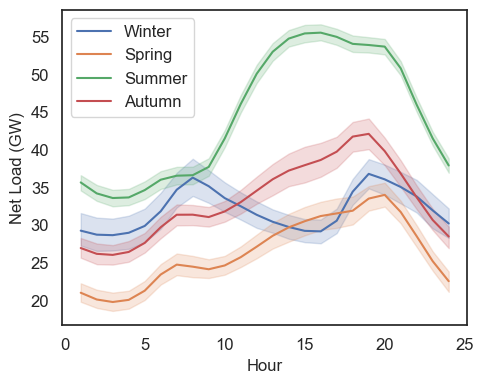

In [7]:
# 
# Plot the responses for different events and regions
%matplotlib inline
sns.set_theme(style="white")
fig = plt.figure(figsize=(5,4))
sns.lineplot(x="Hour", y="Net Load (GW)",
             hue="Season",
             data=result)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
sns.set(rc={"axes.labelsize": 14})
fig.tight_layout()
plt.savefig(".\pics\load_net_profile.pdf")

In [8]:
netload_mean_by_categories = result.groupby(['Season', 'Hour'])['Net Load (GW)'].mean()
print(netload_mean_by_categories)

Season  Hour
Autumn  1       26.979513
        2       26.211293
        3       26.070066
        4       26.459996
        5       27.660089
                  ...    
Winter  20      36.095419
        21      35.081379
        22      33.821181
        23      31.971279
        24      30.239907
Name: Net Load (GW), Length: 96, dtype: float64


In [ ]:
np.savez('.\Interresult\loadnet_winter.npz', data=np.array(netload_mean_by_categories["Winter"]))
np.savez('.\Interresult\loadnet_summer.npz', data=np.array(netload_mean_by_categories["Summer"]))